## Obtaining the Efficient Frontier - Part III

*Suggested Answers follow (usually there are multiple ways to solve a problem in Python).*

Ok, let’s continue the exercise from the last lecture.

In [12]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

assets = ['WMT', 'FB']
pf_data = pd.DataFrame()

for a in assets:
    pf_data[a] = wb.DataReader(a, data_source = 'yahoo', start = '2014-1-1')['Adj Close']

In [13]:
log_returns = np.log(pf_data / pf_data.shift(1))

num_assets = len(assets)

weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.1224871, 0.8775129])

Now, estimate the expected Portfolio Return, Variance, and Volatility.

Expected Portfolio Return:

In [14]:
np.sum(weights * log_returns.mean()) * 250

0.2125830229338431

Expected Portfolio Variance:

In [15]:
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

0.08258080808714507

Expected Portfolio Volatility:

In [16]:
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights)))

0.28736876672169

***

The rest of this exercise will be a reproduction of what we did in the previous video.

1)	Create two empty lists. Name them pf_returns and pf_volatilites.

In [17]:
pf_returns = []
pf_volatilities = []

2)	Create a loop with 1,000 iterations that will generate random weights, summing to 1, and will append the obtained values for the portfolio returns and the portfolio volatilities to pf_returns and pf_volatilities, respectively.

In [18]:
for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pf_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pf_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))
    
for rets, vols in zip(pf_returns, pf_volatilities):
    print(f'Returns: {rets}\nVolatilities: {vols}\n')

Returns: 0.15143982686162694
Volatilities: 0.19984981784425598

Returns: 0.13469033722412485
Volatilities: 0.19190200072701774

Returns: 0.17875764728494342
Volatilities: 0.2300506328639216

Returns: 0.1777959069899139
Volatilities: 0.22869139660971427

Returns: 0.14300417938611876
Volatilities: 0.19470823846598548

Returns: 0.19344646432689608
Volatilities: 0.252895877791971

Returns: 0.1913177670885104
Volatilities: 0.2493628865457851

Returns: 0.19192465380099938
Volatilities: 0.25036310299137055

Returns: 0.19320459338846097
Volatilities: 0.2524910002969734

Returns: 0.11808546978701023
Volatilities: 0.19333043393291405

Returns: 0.19941778538732796
Volatilities: 0.26315702686710785

Returns: 0.16494983745690228
Volatilities: 0.21245203263506787

Returns: 0.21434259438429745
Volatilities: 0.29074859141328946

Returns: 0.1666403237243592
Volatilities: 0.21437062309106947

Returns: 0.18947763196455608
Volatilities: 0.2463653307795354

Returns: 0.13867096319657307
Volatilities: 0.1929

3)	Transform the obtained lists into NumPy arrays and reassign them to pf_returns and pf_volatilites. Once you have done that, the two objects will be NumPy arrays. 

In [19]:
pf_returns = np.array(pf_returns)
pf_volatilities = np.array(pf_volatilities)

#pf_returns, pf_volatilities

Now, create a dictionary, called portfolios, whose keys are the strings “Return” and “Volatility” and whose values are the NumPy arrays pf_returns and pf_volatilities. 

In [20]:
portfolio = pd.DataFrame({'Return': pf_returns, 'Volatility': pf_volatilities})
portfolio.head()

,Return,Volatility
0,0.151440,0.199850
1,0.134690,0.191902
2,0.178758,0.230051
3,0.177796,0.228691
4,0.143004,0.194708


Finally, plot the data from the portfolios dictionary on a graph. Let the x-axis represent the volatility data from the portfolios dictionary and the y-axis – the data about rates of return. <br />
Organize your chart well and make sure you have labeled both the x- and the y- axes.

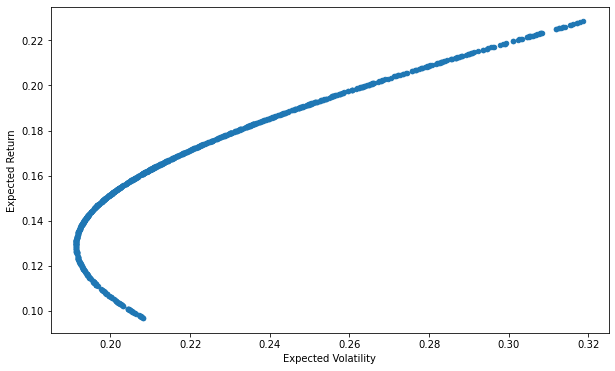

In [21]:
portfolio.plot(kind='scatter', y='Return', x='Volatility', figsize=(10,6))

plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.show()

******

What do you think would happen if you re-created the Markowitz Efficient Frontier for 3 stocks? The code you have created is supposed to accommodate easily the addition of a third stock, say British Petroleum (‘BP’). Insert it in your data and re-run the code (you can expand the “Cell” list from the Jupyter menu and click on “Run All” to execute all the cells at once!). <br />

How would you interpret the obtained graph? 


In [22]:
assets = ['WMT', 'FB', 'BP']
pf_data = pd.DataFrame()

for a in assets:
    pf_data[a] = wb.DataReader(a, data_source = 'yahoo', start = '2014-1-1')['Adj Close']

In [23]:
log_returns = pf_data.transform(np.log).diff()
log_returns

,WMT,FB,BP
Date,,,
2014-01-02,NaN,NaN,NaN
2014-01-03,-0.003300,-0.002745,-0.002295
2014-01-06,-0.005610,0.047253,0.002712
2014-01-07,0.003064,0.012509,0.011393
2014-01-08,-0.007935,0.005338,0.003701
...,...,...,...
2020-06-30,0.006029,0.028726,-0.006838
2020-07-01,-0.000752,0.045120,-0.004728
2020-07-02,-0.004018,-0.017539,0.008580


In [25]:
num_assets = len(assets)
weights = np.random.random(num_assets)
weights /= np.sum(weights)

Expected Portfolio Return:

In [26]:
np.sum(weights * log_returns.mean()) * 250

0.08800841298769971

Expected Portfolio Variance:

In [27]:
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

0.03403457808419691

Expected Portfolio Volatility:

In [28]:
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights)))

0.1844846283141143

*****

In [29]:
pfolio_returns = []
pfolio_volatilities = []

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))
    
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

In [30]:
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities})

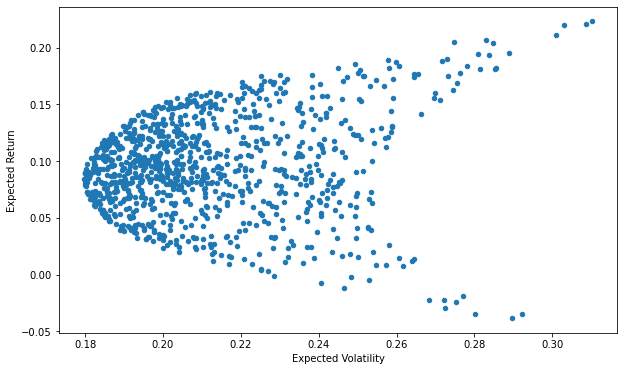

In [31]:
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.show()